In [5]:
import pandas as pd
columns = ['Date', 'Station_Code', 'Location', 'Lat', 'Lon','SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2_5']
df_air = pd.read_csv('Measurement_summary.csv',
                     names = columns, skiprows = 1, header = None)
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          647511 non-null  object 
 1   Station_Code  647511 non-null  int64  
 2   Location      647511 non-null  object 
 3   Lat           647511 non-null  float64
 4   Lon           647511 non-null  float64
 5   SO2           647511 non-null  float64
 6   NO2           647511 non-null  float64
 7   O3            647511 non-null  float64
 8   CO            647511 non-null  float64
 9   PM10          647511 non-null  float64
 10  PM2_5         647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [6]:
#df_air.Location
from collections import deque
Location_city = deque()
for x in df_air.Location:
    x = x.split(',')[2]
    x = x.strip()
    Location_city.append(x)
df_air['Location_City'] = Location_city

In [46]:
df_air.head()

,Date,Station_Code,Location,Lat,Lon,SO2,NO2,O3,CO,PM10,PM2_5,Location_City
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,Jongno-gu
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,Jongno-gu
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,Jongno-gu
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,Jongno-gu
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,Jongno-gu


In [7]:
from datetime import datetime
import numpy as np
subset_df_air = df_air[['Location_City','Date','SO2','NO2','O3','CO']]
subset_df_air.tail()
subset_df_air['Date'] = pd.to_datetime(subset_df_air['Date'])
subset_df_air

/var/folders/l9/glqlxsms6kg26pc8n2s189hw0000gn/T/ipykernel_6623/1520423689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_air['Date'] = pd.to_datetime(subset_df_air['Date'])


,Location_City,Date,SO2,NO2,O3,CO
0,Jongno-gu,2017-01-01 00:00:00,0.004,0.059,0.002,1.2
1,Jongno-gu,2017-01-01 01:00:00,0.004,0.058,0.002,1.2
2,Jongno-gu,2017-01-01 02:00:00,0.004,0.056,0.002,1.2
3,Jongno-gu,2017-01-01 03:00:00,0.004,0.056,0.002,1.2
4,Jongno-gu,2017-01-01 04:00:00,0.003,0.051,0.002,1.2
...,...,...,...,...,...,...
647506,Gangdong-gu,2019-12-31 19:00:00,0.003,0.028,0.013,0.5
647507,Gangdong-gu,2019-12-31 20:00:00,0.003,0.025,0.015,0.4
647508,Gangdong-gu,2019-12-31 21:00:00,0.003,0.023,0.015,0.4
647509,Gangdong-gu,2019-12-31 22:00:00,0.003,0.040,0.004,0.5


In [5]:
cities = df_air.Location_City.unique()
cities

array(['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Eunpyeong-gu',
       'Seodaemun-gu', 'Mapo-gu', 'Seongdong-gu', 'Gwangjin-gu',
       'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu',
       'Dobong-gu', 'Nowon-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu',
       'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu',
       'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu'],
      dtype=object)

In [6]:
Dongde = subset_df_air[subset_df_air.Location_City == cities[8]]
print(cities[8])
Dongde = Dongde[['Date', 'SO2', 'NO2','O3', 'CO']]
Dongde['Date'] = pd.to_datetime(Dongde['Date'])
Dongde = Dongde.groupby(by = [Dongde.Date.dt.month]).mean()
Dongde = Dongde[(Dongde.SO2 >= 0.) & (Dongde.O3 >= 0.) & (Dongde.NO2 >= 0.) & (Dongde.CO >= 0.)]
Dongde.describe()

# Jongno = Jongno[(Jongno.SO2 >= 0.) & (Jongno.NO2 >= 0.) & (Jongno.O3 >= 0.) & (Jongno.CO >= 0.)]
# Jongno_date_df = pd.DataFrame(Jongno_date)
# Jongno = Jongno.join(Jongno_date_df)
# Jongno['Date'] = Jongno['Date'].dt.strftime('%H:%M')
# Jongno.set_index('Date', inplace = True)
# Jongno.plot(subplots = True, figsize = (10,10))

Dongdaemun-gu


,SO2,NO2,O3,CO
count,9.000000,9.000000,9.000000,9.000000
mean,0.005415,0.031753,0.022374,0.540183
std,0.000857,0.006728,0.009600,0.145359
min,0.004111,0.019243,0.011086,0.357316
25%,0.005031,0.028557,0.013251,0.419222
50%,0.005381,0.034449,0.023504,0.513731
75%,0.005604,0.036560,0.030013,0.652037
max,0.006741,0.038110,0.035742,0.731555


In [7]:
31.7/5.41

5.859519408502773

In [8]:
Jongno = subset_df_air[subset_df_air.Location_City == cities[0]]
Jongno = Jongno[['Date', 'SO2', 'NO2','O3', 'CO']]
#Jongno_date = Jongno[[Jongno.Date.dt.time]]
Jongno_2017 = Jongno[Jongno.Date.dt.year == 2017][['SO2', 'NO2','O3', 'CO']]
Jongno_2017.reset_index(inplace = True)
Jongno_2018 = Jongno[Jongno.Date.dt.year == 2018][['SO2', 'NO2','O3', 'CO']]
Jongno_2018.reset_index(inplace = True)
Jongno_2019 = Jongno[Jongno.Date.dt.year == 2019][['SO2', 'NO2','O3', 'CO']]
Jongno_2019.reset_index(inplace = True)
Jongno = pd.concat([Jongno_2019,Jongno_2018,Jongno_2017]).groupby(level = 0).mean()
Jongno = Jongno[['SO2', 'NO2','O3', 'CO']]

Jongno = Jongno[(Jongno.SO2 >= 0.) & (Jongno.NO2 >= 0.) & (Jongno.O3 >= 0.) & (Jongno.CO >= 0.)]
Jongno_date_df = pd.DataFrame(Jongno_date)
Jongno = Jongno.join(Jongno_date_df)
Jongno['Date'] = Jongno['Date'].dt.strftime('%H:%M')
Jongno.set_index('Date', inplace = True)
Jongno.plot(subplots = True, figsize = (10,10))

NameError: name 'Jongno_date' is not defined

In [9]:
Jongno_NO2 = Jongno[['NO2']]
Jongno_O3 = Jongno[['O3']]

Jongno_O3 = Jongno_O3.groupby(Jongno_O3.index)['O3'].mean()
Jongno_NO2 = Jongno_NO2.groupby(Jongno_NO2.index)['NO2'].mean()
Jongno_O3.values

array([0.00866667, 0.00833333, 0.00666667, ..., 0.013     , 0.012     ,
       0.0115    ])

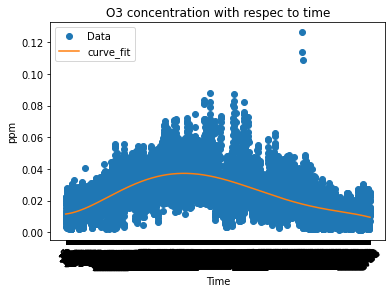

In [10]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
date = list(Jongno_O3.index)
y_O3 = Jongno_O3.values
def func(x,a,b,c,d,e,f):
    return f*x**5 + e*x**4 + a*x**3 + b*x**2 + c*x + d
x = np.linspace(0, len(y_O3), len(y_O3))
popt, *_ = curve_fit(func, x, y_O3)
y_O3_fit = [func(x, *popt) for x in x ]
plt.plot(x,y_O3, 'o', label =  'Data')
plt.plot(x,y_O3_fit, '-', label = 'curve_fit')
plt.legend()
plt.xlabel('Time')
plt.ylabel('ppm')
plt.title('O3 concentration with respec to time')
plt.xticks(x[::2], date[::2], rotation = 45)
plt.savefig('O3ppmbytime.png')

KeyboardInterrupt: 

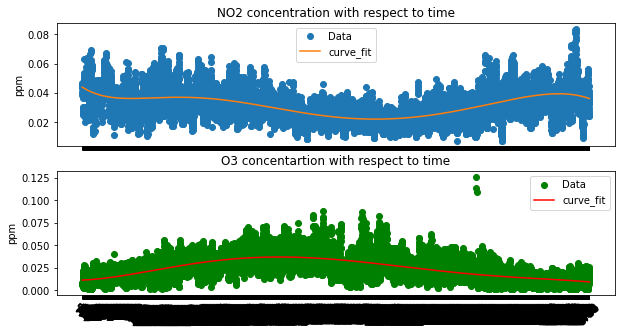

In [11]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
date = list(Jongno_O3.index)
y_NO2 = Jongno_NO2.values
def func(x, a, b, c, d, f, e, g, h):
    return h*x**7 + g*x**6 + f*x**5 + e*x**4  +a*x**3 + b*x**2 + c*x + d
x = np.linspace(0, len(y_NO2), len(y_NO2))
popt, *_ = curve_fit(func, x, y_NO2)
y_NO2_fit = [func(x, *popt) for x in x ]
fig, ax = plt.subplots(2,1,figsize = (10,5), sharex = True)
ax[0].plot(x,y_NO2, 'o', label =  'Data')
ax[0].plot(x,y_NO2_fit, '-', label = 'curve_fit')
ax[0].set_title('NO2 concentration with respect to time')
ax[0].set_ylabel('ppm')
ax[0].legend()
ax[1].plot(x, y_O3, 'go', label = 'Data')
ax[1].plot(x, y_O3_fit, 'r-', label = 'curve_fit')
ax[1].set_title('O3 concentartion with respect to time')
ax[1].set_ylabel('ppm')
ax[1].legend()
plt.xticks(x[::2], date[::2], rotation = 45)
plt.savefig('ppmbytime3.png')

In [8]:

import pandas as pd
peices = []
from collections import defaultdict
def get_data(group):
    group = group[(group.Date.dt.month >= 6) & (group.Date.dt.month <= 9) & (group.Date.dt.hour >= 6) & \
        (group.Date.dt.hour <= 15)]
    group_morning = group[(group.Date.dt.hour >=6 ) & (group.Date.dt.hour <= 10)]
    group_noon = group[(group.Date.dt.hour >= 11) & (group.Date.dt.hour <= 15)]
    cities = group.Location_City.unique()
    pollutants_by_cities_morning = defaultdict(list)
    pollutants_by_cities_noon = defaultdict(list)
    for x in cities:
        pollutants_by_cities_morning[x] = group_morning[group_morning.Location_City == x]
        pollutants_by_cities_noon[x] = group_noon[group_noon.Location_City == x]

    for x in cities:
        pollutants_by_cities_noon[x] = pollutants_by_cities_noon[x].groupby(pollutants_by_cities_noon[x].Date.dt.date).mean()
        pollutants_by_cities_morning[x] = pollutants_by_cities_morning[x].groupby(pollutants_by_cities_morning[x].Date.dt.date).mean()

        pollutants_by_cities_noon[x] = pollutants_by_cities_noon[x][(pollutants_by_cities_noon[x].SO2 >= 0.) & \
                                                                    (pollutants_by_cities_noon[x].O3 >= 0.) & \
                                                                    (pollutants_by_cities_noon[x].NO2 >= 0.) &\
                                                                    (pollutants_by_cities_noon[x].CO >= 0.)]

        pollutants_by_cities_morning[x] = pollutants_by_cities_morning[x][(pollutants_by_cities_morning[x].SO2 >= 0.) & \
                                                                    (pollutants_by_cities_morning[x].O3 >= 0.) & \
                                                                    (pollutants_by_cities_morning[x].NO2 >= 0.) &\
                                                                    (pollutants_by_cities_morning[x].CO >= 0.)]

    for x in cities:
        pollutants_by_cities_noon[x] = pollutants_by_cities_noon[x][['SO2', 'NO2', 'O3','CO']]
        pollutants_by_cities_morning[x] = pollutants_by_cities_morning[x][['SO2','NO2','O3','CO']]
        pollutants_by_cities_noon[x].reset_index(inplace = True)
        pollutants_by_cities_morning[x].reset_index(inplace = True)
    return pollutants_by_cities_morning, pollutants_by_cities_noon
pollutants_morning,pollutants_noon = get_data(subset_df_air)

In [ ]:
pollutants_morning[cities[0]].describe()

In [ ]:
pollutants_noon[cities[0]].describe()

In [9]:
df_date = pd.DataFrame(pollutants_noon['Yeongdeungpo-gu'].Date)
df_morning = pd.concat(pollutants_morning.values()).groupby(level = 0).mean()
df_noon = pd.concat(pollutants_noon.values()).groupby(level = 0).mean()
df_morning = df_morning.join(df_date['Date'])
df_noon = df_noon.join(df_date['Date'])
df_morning.set_index('Date', inplace = True)
df_noon.set_index('Date', inplace = True)

In [10]:
from_morning = df_morning[['NO2','SO2']]
from_noon = df_noon[['O3','CO']]
df_morning_noon = from_noon.join(from_morning)
df_morning_noon

,O3,CO,NO2,SO2
Date,,,,
2017-06-01,0.048536,0.325600,0.020784,0.003680
2017-06-02,0.047936,0.250400,0.018240,0.003728
2017-06-03,0.051976,0.299200,0.015344,0.004256
2017-06-04,0.062312,0.272000,0.018344,0.003696
2017-06-05,0.069112,0.332000,0.027568,0.003720
...,...,...,...,...
2019-09-26,0.033753,0.348235,0.026256,0.003367
2019-09-27,0.044812,0.382500,0.027733,0.003467
2019-09-28,0.058280,0.429333,0.029800,0.003455


In [2]:
df_noon

NameError: name 'df_noon' is not defined

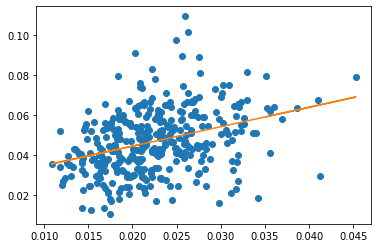

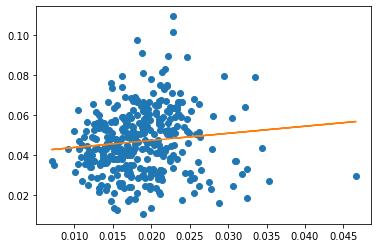

noon error is first: 0.0002507853486468012 
noon morning error is: 0.00022347015160325485


In [45]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
def func(x,a,b):
    return a*x + b
x_NO2_morn = [x for x_sub in df_morning[['NO2']].values for x in x_sub]
# x_SO2_morn = df_morning[['SO2']]
# x_SO2_morn = x_SO2_morn.values

x_NO2_noon = [x for x_sub in df_noon[['NO2']].values for x in x_sub]
x_NO2_noon = x_NO2_noon[:len(x_NO2_morn)]
# x_SO2_noon = df_noon[['SO2']]
# x_SO2_noon = x_SO2_noon.values
y_O3_noon = [x for x_sub in df_noon[['O3']].values for x in x_sub]
y_O3_noon = y_O3_noon[:len(x_NO2_morn)]

popt_NO2_morn, *_ = curve_fit(func, x_NO2_morn, y_O3_noon)
popt_NO2_noon, *_ = curve_fit(func, x_NO2_noon, y_O3_noon)
y_fit_NO2_morn = [func(x, *popt_NO2_morn) for x in x_NO2_morn]
y_fit_NO2_noon = [func(x, *popt_NO2_noon) for x in x_NO2_noon]
plt.plot(x_NO2_morn, y_O3_noon, 'o')
plt.plot(x_NO2_morn, y_fit_NO2_morn)
plt.show()
plt.plot(x_NO2_noon, y_O3_noon, 'o')
plt.plot(x_NO2_noon, y_fit_NO2_noon, '-')
plt.show()

from sklearn.metrics import mean_squared_error
# y_O3_noon_error = [x for x in y_O3_noon if x >= 0.06]
# y_fit_NO2_morn_error = [x for x in y_fit_NO2_morn if x >= 0.03]
# y_fit_NO2_noon_error = [x for x in y_fit_NO2_noon if x >= 0.03 ]

print('noon error is first:', mean_squared_error(y_O3_noon, y_fit_NO2_noon),
      '\nnoon morning error is:', mean_squared_error(y_O3_noon, y_fit_NO2_morn))

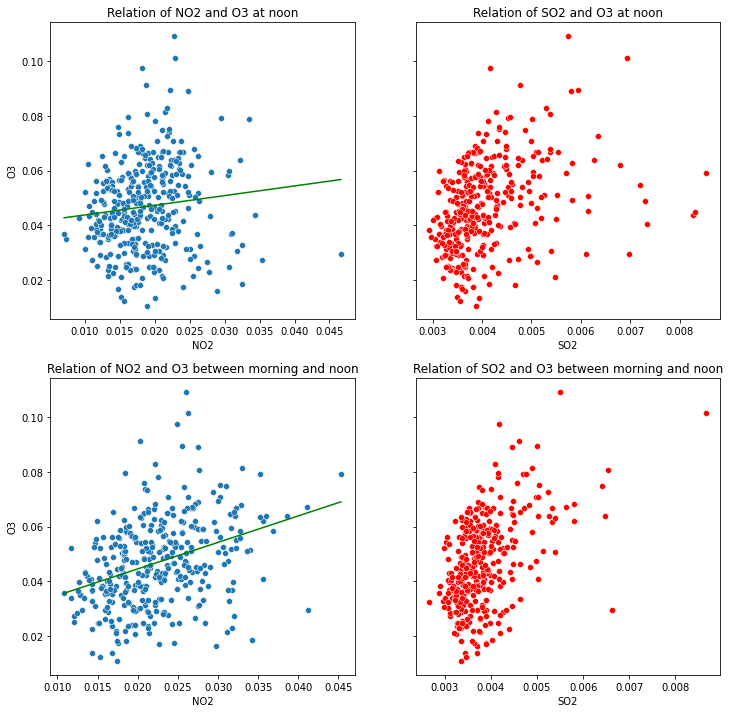

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize = (12,12), sharey = True)

sns.scatterplot(ax = axes[0][0], x = 'NO2', y = 'O3', data = df_noon)
axes[0][0].set_title('Relation of NO2 and O3 at noon')
sns.lineplot(ax = axes[0][0], x = x_NO2_noon, y = y_fit_NO2_noon, color = 'g')

sns.scatterplot(ax = axes[0][1], x = 'SO2', y = 'O3', color = 'r' ,data = df_noon)
axes[0][1].set_title('Relation of SO2 and O3 at noon')


sns.scatterplot(ax = axes[1][0], x = 'NO2', y = 'O3', data = df_morning_noon)
axes[1][0].set_title('Relation of NO2 and O3 between morning and noon')
sns.lineplot(ax = axes[1][0], x = x_NO2_morn, y = y_fit_NO2_morn, color = 'g')

sns.scatterplot(ax = axes[1][1], x = 'SO2', y = 'O3', color = 'r', data = df_morning_noon)
axes[1][1].set_title('Relation of SO2 and O3 between morning and noon')


plt.savefig('Relationschemi3.png')

In [44]:
import numpy as np
np.square(np.array(y_O3_noon) - np.array(y_fit_NO2_morn)).mean(axis = 0)

0.00022347015160325485

noon error is: 0.12427604402992141 
noon morning error is: 0.12377623304093947


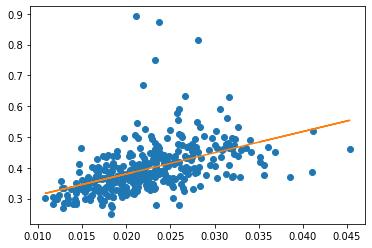

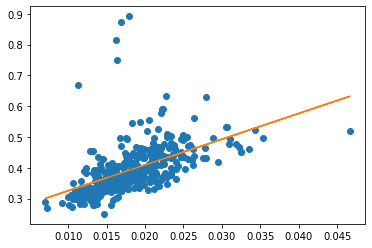

In [17]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
def func(x,a,b):
    return a*x + b
x_NO2_morn = [x for x_sub in df_morning[['NO2']].values for x in x_sub]
# x_SO2_morn = df_morning[['SO2']]
# x_SO2_morn = x_SO2_morn.values

x_NO2_noon = [x for x_sub in df_noon[['NO2']].values for x in x_sub]
x_NO2_noon = x_NO2_noon[:len(x_NO2_morn)]
# x_SO2_noon = df_noon[['SO2']]
# x_SO2_noon = x_SO2_noon.values
y_CO_noon = [x for x_sub in df_noon[['CO']].values for x in x_sub]
y_CO_noon = y_CO_noon[:len(x_NO2_morn)]
popt_NO2_morn, *_ = curve_fit(func, x_NO2_morn, y_CO_noon)
popt_NO2_noon, *_ = curve_fit(func, x_NO2_noon, y_CO_noon)
y_fit_NO2_morn = [func(x, *popt_NO2_morn) for x in x_NO2_morn]
y_fit_NO2_noon = [func(x, *popt_NO2_noon) for x in x_NO2_noon]
plt.plot(x_NO2_morn, y_CO_noon, 'o')
plt.plot(x_NO2_morn, y_fit_NO2_morn)
plt.show()
plt.plot(x_NO2_noon, y_CO_noon, 'o')
plt.plot(x_NO2_noon, y_fit_NO2_noon)

In [488]:
len(y_fit_No2_morn)

NameError: name 'y_fit_No2_morn' is not defined

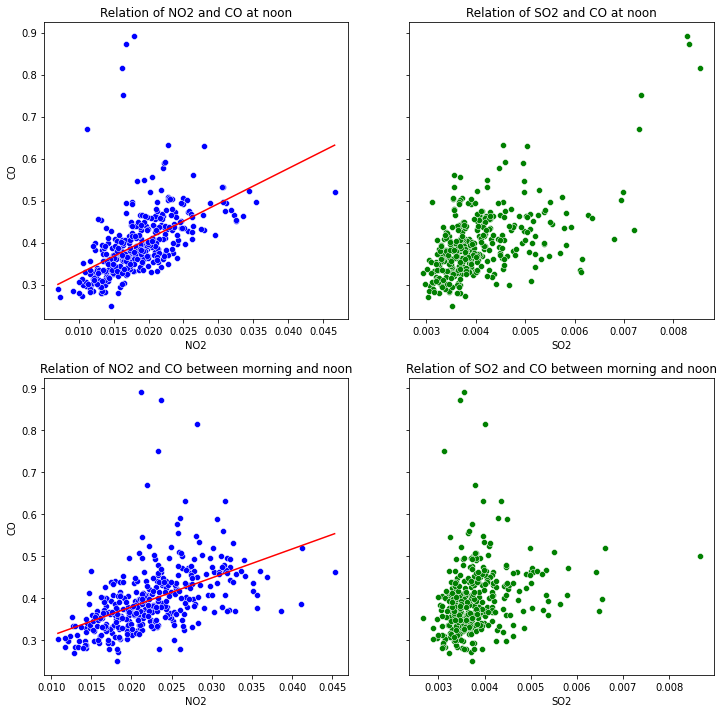

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize = (12,12), sharey = True)

sns.scatterplot(ax = axes[0][0], x = 'NO2', y = 'CO', color = 'b', data = df_noon)
sns.lineplot(ax = axes[0][0], x = x_NO2_noon, y = y_fit_NO2_noon, color = 'r')
axes[0][0].set_title('Relation of NO2 and CO at noon')

sns.scatterplot(ax = axes[0][1], x = 'SO2', y = 'CO', color = 'g' ,data = df_noon)
axes[0][1].set_title('Relation of SO2 and CO at noon')

sns.scatterplot(ax = axes[1][0], x = 'NO2', y = 'CO', color = 'b', data = df_morning_noon)
sns.lineplot(ax = axes[1][0], x = x_NO2_morn, y = y_fit_NO2_morn, color = 'r')
axes[1][0].set_title('Relation of NO2 and CO between morning and noon')


sns.scatterplot(ax = axes[1][1], x = 'SO2', y = 'CO', color = 'g', data = df_morning_noon)
axes[1][1].set_title('Relation of SO2 and CO between morning and noon')


plt.savefig('Relationschemi4.png')

In [19]:
from sklearn.metrics import mean_squared_error
print('noon error is:',mean_squared_error(y_CO_noon, y_fit_NO2_noon),
      '\nnoon morning error is:',mean_squared_error(y_CO_noon, y_fit_NO2_morn))

noon error is: 0.004877675102083701 
noon morning error is: 0.005093126380295538


In [421]:
O3_noon = df_noon['O3'].values
NO2_morning = df_morning['NO2'].values
NO2_noon = df_noon['NO2'].values
SO2_morning = df_morning['SO2'].values
SO2_noon = df_noon['SO2'].values
NO2_noon= NO2_noon[:len(NO2_morning)]
SO2_noon = SO2_noon[:len(SO2_morning)]
O3_noon = O3_noon[:len(NO2_morning)]
import numpy as np
print('O3_noon vs NO2_morning', np.corrcoef(O3_noon, NO2_morning)[1][0],
      '\nO3_noon vs NO2_noon', np.corrcoef(O3_noon, NO2_noon)[1][0],
      '\nO3_noon vs SO2_morning', np.corrcoef(O3_noon, SO2_morning)[1][0],
      '\nO3_noon vs SO2_noon', np.corrcoef(O3_noon, SO2_noon)[1][0])

O3_noon vs NO2_morning 0.34622236332490103 
O3_noon vs NO2_noon 0.11085978184081775 
O3_noon vs SO2_morning 0.49234244293412927 
O3_noon vs SO2_noon 0.3537349417637684


In [493]:
CO_noon = df_noon['CO'].values
NO2_morning = df_morning['NO2'].values
NO2_noon = df_noon['NO2'].values
SO2_morning = df_morning['SO2'].values
SO2_noon = df_noon['SO2'].values
NO2_noon= NO2_noon[:len(NO2_morning)]
SO2_noon = SO2_noon[:len(SO2_morning)]
CO_noon = CO_noon[:len(NO2_morning)]
import numpy as np
print('CO_noon vs NO2_morning', np.corrcoef(CO_noon, NO2_morning)[1][0],
      '\nCO_noon vs NO2_noon', np.corrcoef(CO_noon, NO2_noon)[1][0],
      '\nCO_noon vs SO2_morning', np.corrcoef(CO_noon, SO2_morning)[1][0],
      '\nCO_noon vs SO2_noon', np.corrcoef(CO_noon, SO2_noon)[1][0])

CO_noon vs NO2_morning 0.48109401247275096 
CO_noon vs NO2_noon 0.513773168060814 
CO_noon vs SO2_morning 0.2428189114807494 
CO_noon vs SO2_noon 0.6021827925204529


In [420]:
len(NO2_morning)

363

In [373]:
print(len(df_morning),
      len(df_noon),
      len(df_date))

df_morning.join(df_date.Date)
df_morning

364 364 364


,SO2,NO2,O3,CO
Date,,,,
2017-06-01,0.003696,0.014880,0.048536,0.325600
2017-06-02,0.003512,0.014608,0.047936,0.250400
2017-06-03,0.003688,0.011544,0.051976,0.299200
2017-06-04,0.003776,0.010464,0.062312,0.272000
2017-06-05,0.003856,0.017856,0.069112,0.332000
...,...,...,...,...
2019-09-26,0.003188,0.022835,0.033753,0.348235
2019-09-27,0.003563,0.022562,0.044812,0.382500
2019-09-28,0.003640,0.021053,0.058280,0.429333


In [190]:
type(df_morning)

pandas.core.frame.DataFrame

In [189]:
df_date = pd.DataFrame(df_date)
df_date["Date"]

0      2017-06-01
1      2017-06-02
2      2017-06-03
3      2017-06-04
4      2017-06-05
          ...    
359    2019-09-26
360    2019-09-27
361    2019-09-28
362    2019-09-29
363    2019-09-30
Name: Date, Length: 364, dtype: object

In [186]:
from collections import defaultdict
import numpy as np
cities = subset_df_air.Location_City.unique()
type(a[cities[0]])

print(cities[4]) #성동구

city_dict = defaultdict(list)
for x in [cities[0], cities[1]]:
    n = len(a[x])
    city_list = []
    for i in range(n):
        city_list.append(a[x].index[i])
    city_dict[x].append(np.array(city_list))

test = [cities[0], cities[1]]
diff = np.setxor1d(city_dict[test[0]], city_dict[test[1]])

diff



# com_1 = {a[cities[4]].index}
#

Seodaemun-gu


array([datetime.date(2017, 8, 10)], dtype=object)

In [62]:
city_dict

defaultdict(list,
            {'Jongno-gu': [array([datetime.date(2017, 6, 1), datetime.date(2017, 6, 2),
                     datetime.date(2017, 6, 3), datetime.date(2017, 6, 4),
                     datetime.date(2017, 6, 5), datetime.date(2017, 6, 6),
                     datetime.date(2017, 6, 7), datetime.date(2017, 6, 8),
                     datetime.date(2017, 6, 9), datetime.date(2017, 6, 10),
                     datetime.date(2017, 6, 11), datetime.date(2017, 6, 12),
                     datetime.date(2017, 6, 13), datetime.date(2017, 6, 14),
                     datetime.date(2017, 6, 15), datetime.date(2017, 6, 16),
                     datetime.date(2017, 6, 17), datetime.date(2017, 6, 18),
                     datetime.date(2017, 6, 19), datetime.date(2017, 6, 20),
                     datetime.date(2017, 6, 21), datetime.date(2017, 6, 22),
                     datetime.date(2017, 6, 23), datetime.date(2017, 6, 24),
                     datetime.date(2017, 6, 25), datet

In [50]:
import numpy as np
a = np.array([1,2,3])
b = np.array([3,4,5])
np.setxor1d(a,b)

array([1, 2, 4, 5])

In [ ]:
Jongno_pollutants_morning.reset_index(inplace = True)
a = datetime.strptime('2019-7-4', '%Y-%m-%d')
Jongno_pollutants_morning = Jongno_pollutants_morning[Jongno_pollutants_morning.Date != a.date()]
len(Jongno_pollutants)

In [10]:
len(Jongno_pollutants_morning)

361

In [11]:
Jongno_pollutants_morning.set_index('Date',inplace = True)
Jongno_pollutants_morning

,SO2,NO2,O3,CO,PM10,PM2_5
Date,,,,,,
2017-06-01,0.0030,0.0182,0.0528,0.40,33.8,19.8
2017-06-02,0.0028,0.0180,0.0492,0.30,23.6,4.8
2017-06-03,0.0030,0.0120,0.0540,0.32,27.2,9.6
2017-06-04,0.0030,0.0100,0.0638,0.30,22.8,6.6
2017-06-05,0.0030,0.0224,0.0738,0.40,20.2,8.8
...,...,...,...,...,...,...
2019-09-26,0.0032,0.0206,0.0298,0.40,21.4,14.0
2019-09-27,0.0032,0.0244,0.0254,0.42,18.6,11.0
2019-09-28,0.0038,0.0204,0.0406,0.38,28.2,20.8


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

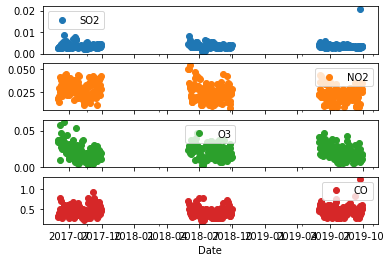

In [12]:
Jongno_pollutants = Jongno_pollutants[['SO2','NO2', 'O3','CO']]
Jongno_pollutants_morning = Jongno_pollutants_morning[['SO2','NO2', 'O3','CO']]
Jongno_pollutants.plot(subplots = True, style = 'o')

In [13]:
import numpy as np
Jongno_pollutants_copy = Jongno_pollutants.copy()
Jongno_pollutants_morning_copy = Jongno_pollutants_morning.copy()
Jongno_pollutants_copy.reset_index(inplace = True)
Jongno_pollutants_morning_copy.reset_index(inplace = True)

n = len(Jongno_pollutants_copy)
Jongno_pollutants_CO = np.reshape(Jongno_pollutants_copy[['CO']].to_numpy(),n)
Jongno_pollutants_O3 = np.reshape(Jongno_pollutants_copy[['O3']].to_numpy(),n)
Jongno_pollutants_SO2 = np.reshape(Jongno_pollutants_copy[['SO2']].to_numpy(),n)
Jongno_pollutants_NO2 = np.reshape(Jongno_pollutants_copy[['NO2']].to_numpy(),n)

m = len(Jongno_pollutants_morning_copy)
Jongno_pollutants_morning_CO = np.reshape(Jongno_pollutants_morning_copy[['CO']].to_numpy(),m)
Jongno_pollutants_morning_O3 = np.reshape(Jongno_pollutants_morning_copy[['O3']].to_numpy(),m)
Jongno_pollutants_morning_SO2 = np.reshape(Jongno_pollutants_morning_copy[['SO2']].to_numpy(),m)
Jongno_pollutants_morning_NO2 = np.reshape(Jongno_pollutants_morning_copy[['NO2']].to_numpy(),m)


pollution = {}
pollution_morning = {}
pollution['O3'] = Jongno_pollutants_O3
pollution['CO'] = Jongno_pollutants_CO
pollution['SO2'] = Jongno_pollutants_SO2
pollution['NO2'] = Jongno_pollutants_NO2

pollution_morning['O3'] = Jongno_pollutants_morning_O3
pollution_morning['CO'] = Jongno_pollutants_morning_CO
pollution_morning['SO2'] = Jongno_pollutants_morning_SO2
pollution_morning['NO2'] = Jongno_pollutants_morning_NO2

len(pollution['O3'])
#p.corrcoef(pollution['NO2'], pollution_morning['O3'])

361

In [14]:
np.corrcoef(pollution['CO'], pollution_morning['SO2'])

array([[1.        , 0.18318019],
       [0.18318019, 1.        ]])

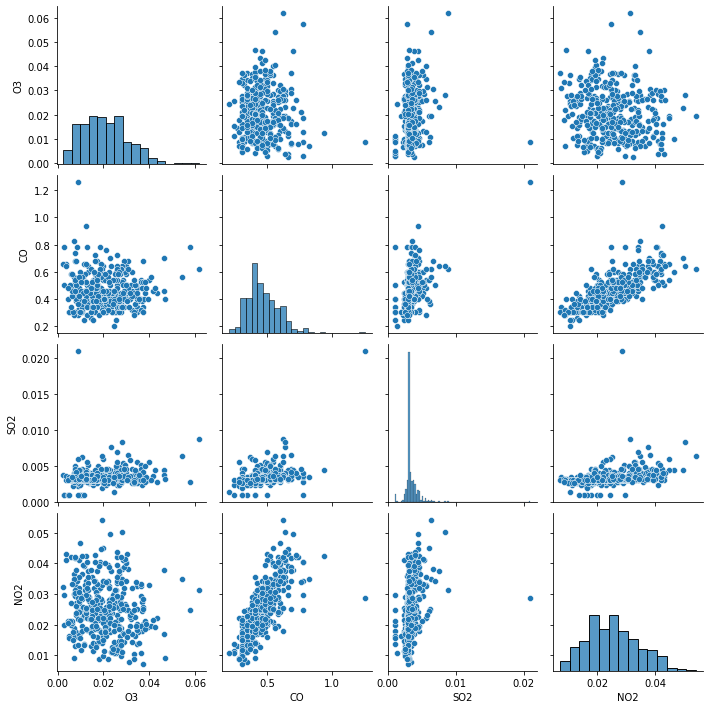

In [15]:
import seaborn as sns
import pandas as pd
pollution_df = pd.DataFrame(pollution)
sns.pairplot(pollution_df)

In [16]:
Jong

NameError: name 'Jong' is not defined

In [17]:
ㅇimport pandas as pd
columns = ['index', 'date', 'Mj/m2', 'W/m2']
df_UV = pd.read_csv('UV2018.csv')
df_UV

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 0: invalid start byte

In [47]:
import numpy as np
target = {'SO2': 522, 'NO2': 469,
          'CO': 1027, 'O3': 586, 'O2': 498}
photon = np.reshape(df_uv.values, len(df_uv))*1000
sput = zip(target.keys(), [0,0,0,0,0])
sput = dict(sput)

In [48]:
photon

array([1240., 1250., 1220.,  930., 1300., 1190., 1200.,  770., 1100.,
        850., 1210., 1560., 1130.,  930., 1210., 1450., 1160., 1280.,
        570., 1350., 1350., 1410., 1320., 1350., 1090.,  140., 1100.,
        290., 1060.,  870.,  120.,  910., 1560., 1490., 1380.,  610.,
       1540., 1260.,  360.,  950., 1330., 1180., 1130., 1410., 1560.,
       1560., 1600., 1410., 1480., 1340., 1550., 1550., 1530., 1490.,
       1400., 1450., 1490., 1540., 1530., 1450., 1430., 1460., 1480.,
       1450., 1490., 1410., 1460., 1230., 1270., 1270., 1130., 1450.,
       1380., 1350., 1290., 1430., 1340., 1220., 1190.,  650., 1350.,
        590.,  700.,  550.,  590.,  490.,  610., 1130., 1050.,  810.,
       1280., 1080.,  720., 1270., 1260.,  710.,  930., 1220., 1220.,
       1160.,  900., 1180.,  560.,  450.,  460.,  410., 1140., 1030.,
        590.,  470.,  440., 1050.,  980., 1050., 1050.,  970., 1040.,
        550., 1020.,  960.])

In [49]:
for i in range(10000):
    shoot = np.random.choice(photon)
    for x in target:
        if shoot >= target[x]:
            sput[x] += 1
sput.values()

dict_values([9164, 9321, 6961, 8838, 9164])

In [50]:
prob = [sput[x]/np.sum(list(sput.values())) for x in sput]
prob_sput = zip(target.keys(), prob)
prob_sput = dict(prob_sput)
prob_sput

{'SO2': 0.21091879948444117,
 'NO2': 0.21453231449088567,
 'CO': 0.16021450929847172,
 'O3': 0.20341557724176026,
 'O2': 0.21091879948444117}

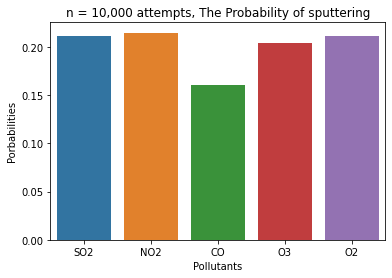

In [56]:
import seaborn as sns
fig = sns.barplot(x = list(prob_sput.keys()), y = list(prob_sput.values()))
fig.set(xlabel = 'Pollutants', ylabel = 'Porbabilities', title = 'n = 10,000 attempts, The Probability of sputtering')
paint = fig.get_figure()
paint.savefig('Probability_of_sputtering.png')

In [57]:
print('hi')

hi


<AxesSubplot:xlabel='Date'>

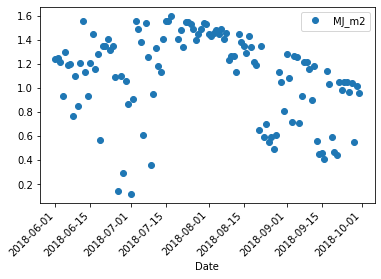

In [34]:
colunms = ['Code', 'Date', 'MJ_m2','W/m2']
df_uv = pd.read_csv('UV2018.csv', encoding= 'unicode_escape', header = None, skiprows = 1, names = colunms)
df_uv = df_uv[['Date', 'MJ_m2']]
df_uv = df_uv[df_uv.MJ_m2 >= 0.0]
df_uv['Date'] = pd.to_datetime(df_uv['Date'])
df_uv = df_uv[(df_uv.Date.dt.month >= 6) & (df_uv.Date.dt.month <= 9)]
df_uv.set_index('Date', inplace = True)
df_uv.plot(rot = 45, style = 'o')

In [36]:
df_uv.values

array([[1.24],
       [1.25],
       [1.22],
       [0.93],
       [1.3 ],
       [1.19],
       [1.2 ],
       [0.77],
       [1.1 ],
       [0.85],
       [1.21],
       [1.56],
       [1.13],
       [0.93],
       [1.21],
       [1.45],
       [1.16],
       [1.28],
       [0.57],
       [1.35],
       [1.35],
       [1.41],
       [1.32],
       [1.35],
       [1.09],
       [0.14],
       [1.1 ],
       [0.29],
       [1.06],
       [0.87],
       [0.12],
       [0.91],
       [1.56],
       [1.49],
       [1.38],
       [0.61],
       [1.54],
       [1.26],
       [0.36],
       [0.95],
       [1.33],
       [1.18],
       [1.13],
       [1.41],
       [1.56],
       [1.56],
       [1.6 ],
       [1.41],
       [1.48],
       [1.34],
       [1.55],
       [1.55],
       [1.53],
       [1.49],
       [1.4 ],
       [1.45],
       [1.49],
       [1.54],
       [1.53],
       [1.45],
       [1.43],
       [1.46],
       [1.48],
       [1.45],
       [1.49],
       [1.41],
       [1.

In [26]:
Jongno_pollutants_dict = {}
for x in Jongno_pollutants.index:
    if x.date not in Jongno_pollutants_dict:
        Jongno_pollutants[x.date] = Jongno_pollutants[x]
    else:
        Jongno_pollutants[x.date].append(Jongno_pollutants[x])
Jongno_pollutants_dict

KeyError: Timestamp('2017-06-01 11:00:00')

In [21]:
Jongno_pollutants_dict.keys()

dict_keys([datetime.date(2017, 6, 1), datetime.date(2017, 6, 2), datetime.date(2017, 6, 3), datetime.date(2017, 6, 4), datetime.date(2017, 6, 5), datetime.date(2017, 6, 6), datetime.date(2017, 6, 7), datetime.date(2017, 6, 8), datetime.date(2017, 6, 9), datetime.date(2017, 6, 10), datetime.date(2017, 6, 11), datetime.date(2017, 6, 12), datetime.date(2017, 6, 13), datetime.date(2017, 6, 14), datetime.date(2017, 6, 15), datetime.date(2017, 6, 16), datetime.date(2017, 6, 17), datetime.date(2017, 6, 18), datetime.date(2017, 6, 19), datetime.date(2017, 6, 20), datetime.date(2017, 6, 21), datetime.date(2017, 6, 22), datetime.date(2017, 6, 23), datetime.date(2017, 6, 24), datetime.date(2017, 6, 25), datetime.date(2017, 6, 26), datetime.date(2017, 6, 27), datetime.date(2017, 6, 28), datetime.date(2017, 6, 29), datetime.date(2017, 6, 30), datetime.date(2017, 7, 1), datetime.date(2017, 7, 2), datetime.date(2017, 7, 3), datetime.date(2017, 7, 4), datetime.date(2017, 7, 5), datetime.date(2017, 7, 

In [13]:
pd.DataFrame(subset_df_air_noon)

,0,1
0,Dobong-gu,Location_City Date SO...
1,Dongdaemun-gu,Location_City Date S...
2,Dongjak-gu,Location_City Date SO...
3,Eunpyeong-gu,Location_City Date SO...
4,Gangbuk-gu,Location_City Date SO...
5,Gangdong-gu,Location_City Date SO...
6,Gangnam-gu,Location_City Date SO...
7,Gangseo-gu,Location_City Date SO...
8,Geumcheon-gu,Location_City Date SO...
9,Guro-gu,Location_City Date SO...


In [ ]:
from collections import defaultdict
pollutants_cities = defaultdict(list)
for x in subset_df_air_noon.Location_City:
    pollutants_cities[x].append(subset_df_air_noon[['Date', 'SO2', 'NO2', 'O3', 'CO']])
pollutants_cities

In [184]:
cities = subset_df_air.Location_City.unique()
Jongno = subset_df_air_noon[subset_df_air_noon.Location_City == cities[0]]
Jongno_pollutants = Jongno[['Date','SO2','NO2','O3','CO']]
Jongno_dust = Jongno[['Date', 'PM10', 'PM2_5']]
Jongno_pollutants.set_index('Date', inplace = True)
Jongno_dust.set_index('Date', inplace = True)
Jongno_dust.tail()

,PM10,PM2_5
Date,,
2019-09-30 11:00:00,36.0,25.0
2019-09-30 12:00:00,39.0,26.0
2019-09-30 13:00:00,39.0,27.0
2019-09-30 14:00:00,40.0,29.0
2019-09-30 15:00:00,37.0,26.0


In [228]:
Geumcheon = subset_df_air_noon[subset_df_air_noon.Location_City == 'Geumcheon-gu']
Geumcheon_pollutants = Geumcheon[['Date','SO2','NO2','O3','CO']]
Geumcheon_dust = Geumcheon[['Date', 'PM10', 'PM2_5']]
test_Geumcheon = Geumcheon_pollutants[Geumcheon_pollutants.Date.dt.year == 2017]
Geumcheon_pollutants.set_index('Date', inplace = True)
Geumcheon_dust.set_index('Date', inplace = True)
Geumcheon_dust.tail()

,PM10,PM2_5
Date,,
2019-09-30 11:00:00,40.0,27.0
2019-09-30 12:00:00,41.0,29.0
2019-09-30 13:00:00,40.0,26.0
2019-09-30 14:00:00,42.0,27.0
2019-09-30 15:00:00,41.0,26.0


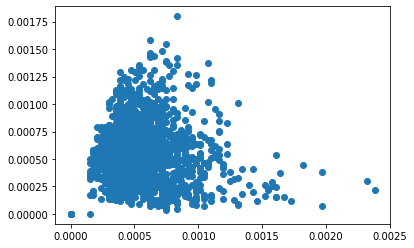

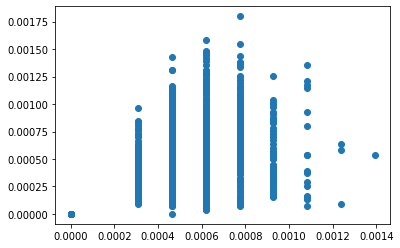

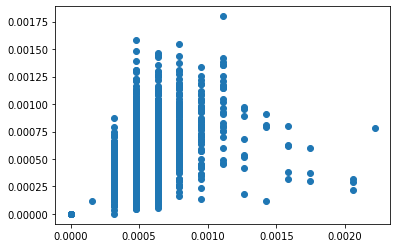

In [269]:
import matplotlib.pyplot as plt
import numpy as np
Geumcheon_NO2 = Geumcheon_pollutants.NO2[Geumcheon_pollutants.NO2 >= 0.0]
Geumcheon_NO2 = Geumcheon_NO2.values
Geumcheon_O3 = Geumcheon_pollutants.O3[Geumcheon_pollutants.O3 >= 0.0]
Geumcheon_O3 = Geumcheon_O3.values
Geumcheon_CO = Geumcheon_pollutants.CO[Geumcheon_pollutants.CO >= 0.0]
Geumcheon_CO = Geumcheon_CO.values
Geumcheon_SO2 = Geumcheon_pollutants.SO2[Geumcheon_pollutants.SO2 >= 0.0]
Geumcheon_SO2 = Geumcheon_SO2.values
Date = Geumcheon_pollutants.index[Geumcheon_pollutants.NO2 >= 0.0]
Geumcheon_SO2_normed = [x/np.sum(Geumcheon_SO2) for x in Geumcheon_SO2]
Geumcheon_NO2_normed = [x/np.sum(Geumcheon_NO2) for x in Geumcheon_NO2 ]
Geumcheon_O3_normed = [x/np.sum(Geumcheon_O3) for x in Geumcheon_O3]
Geumcheon_CO_normed = [x/np.sum(Geumcheon_CO) for x in Geumcheon_CO]
plt.plot(Geumcheon_NO2_normed,Geumcheon_O3_normed,'o')
plt.show()
plt.plot(Geumcheon_CO_normed, Geumcheon_O3_normed,'o')
plt.show()
plt.plot(Geumcheon_SO2_normed, Geumcheon_O3_normed, 'o')

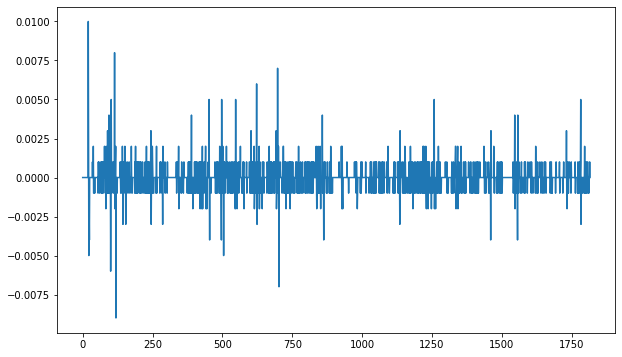

In [274]:
def random_walk(sequence):
    n = len(sequence)
    diff_list = []
    for i in range(n):
        try:
            diff = sequence[i+1] - sequence[i]
            diff_list.append(diff)
        except IndexError:
            break
    return diff_list
random_SO2 = random_walk(Geumcheon_SO2)
plt.figure(figsize=(10,6))
x = np.linspace(0, len(random_SO2),len(random_SO2))
plt.plot(x, random_SO2,'-')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

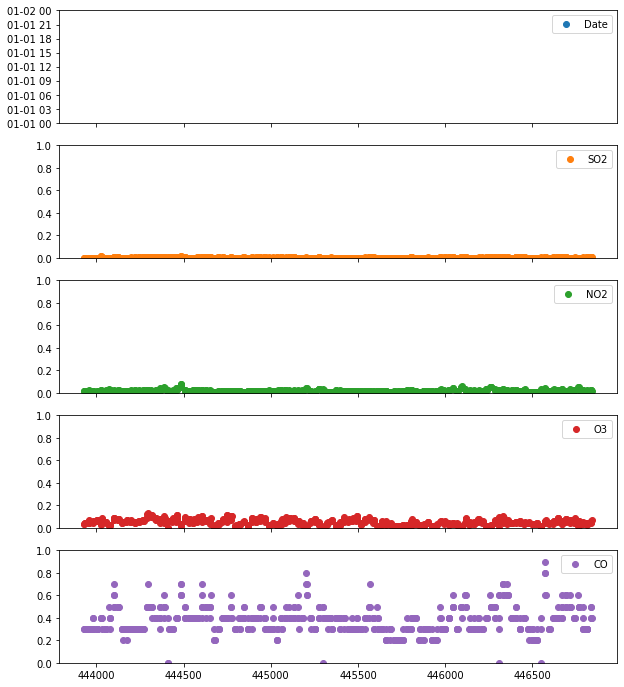

In [245]:
test_Geumcheon.plot(subplots = True, figsize = (10,12), style = 'o', ylim = (0,1))

In [ ]:
from collections import defaultdict
cities = subset_df_air.Location_City.unique()
pollutants_by_city = defaultdict(list)
dust_by_city = defaultdict(list)
for x in subset_df_air.Location_City:
    pollutants_by_city[x] = subset_df_air[['Date','SO2','NO2','O3','CO']]
    dust_by_city[x] = subset_df_air[['Date', 'PM10', 'PM2_5']]

In [ ]:
Jongno_polutants = pollutants_by_city[cities[0]]
Jongno_polutants = Jongno.set_index('Date')
Jongno_dust = dust_by_city[cities[0]]
Jongno_dust = Jongno_dust.set_index('Date')
Jongno_polutants.plot('Pollutants')
Jongno_dust.plot(title = 'Dust')

In [ ]:
pollutants_by_city

In [ ]:
subset_df_air_2 = df_air.pivot_table(['SO'])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

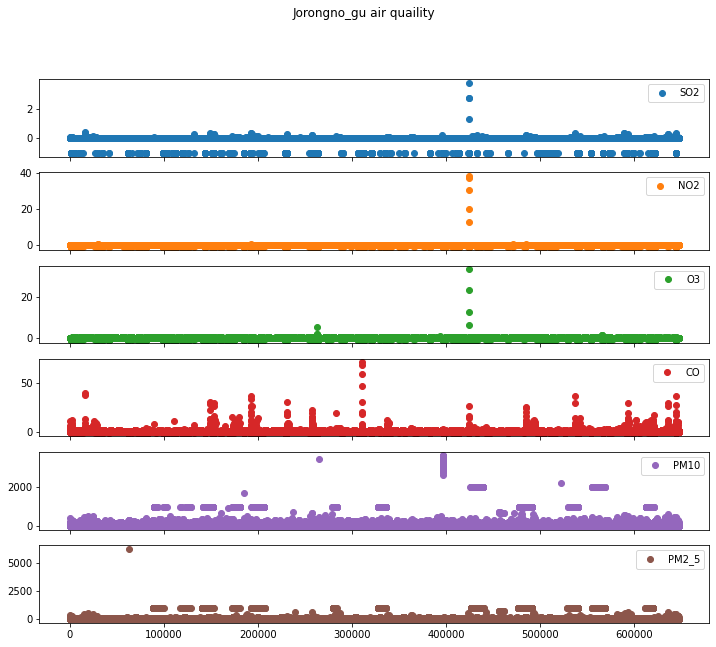

In [63]:
Jongno_air = subset_df_air[['SO2','NO2','O3','CO','PM10','PM2_5']]
Jongno_air.plot(subplots = True, figsize = (12,10), grid = False,
                title = 'Jorongno_gu air quaility', style = 'o')

0        Jongno-gu
1        Jongno-gu
2        Jongno-gu
3        Jongno-gu
4        Jongno-gu
           ...    
25900    Jongno-gu
25901    Jongno-gu
25902    Jongno-gu
25903    Jongno-gu
25904    Jongno-gu
Name: Location_City, Length: 25905, dtype: object